**Questions**
1. What are the most dangerous types of sharks to humans?
2. Are children more likely to be attacked by sharks?
3. Are shark attacks where sharks were provoked more or less dangerous?
4. Are certain activities more likely to result in a shark attack?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt

url = 'https://raw.githubusercontent.com/BartWinter/assignment_shark_attack/main/attacks.csv'
df = pd.read_csv(url, encoding='cp1252')

#drop irrelevant columns
df.drop(columns=['Year', 'Injury', 'Case Number', 'Date', 'Sex ', 'Country', 'Area', 'Location', 'Name', 'Time', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23'], inplace=True)

#rename columns
df = df.rename(columns={'Fatal (Y/N)': 'Fatal', 'Species ': 'Species'})
display(df)



,Type,Activity,Age,Fatal,Species
0,Boating,Paddling,57,N,White shark
1,Unprovoked,Standing,11,N,NaN
2,Invalid,Surfing,48,N,NaN
3,Unprovoked,Surfing,NaN,N,2 m shark
4,Provoked,Free diving,NaN,N,"Tiger shark, 3m"
...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN


**Analysis of the dataset**

In [4]:
#Functions for finding missing data

#Looking at all the unique values

def all_unique_values(col):
  return df.loc[:, col].unique()

#Look at all the unique values in alphabetical order
def all_unique_values_alphabetical(col):
  return df.loc[:,col].sort_values().unique()

#Sorting and looking at the edges

def sort_values(col):
  return df.loc[:, col].sort_values()

#Sorting and looking at the edges

def sort_values_2(col):
  return len(df.loc[:, col].unique())

#Casting to a type

def casting_to_a_type(col):
  return df.loc[:, col].astype('int')

#Looking at the frequency

def looking_at_the_frequency(col):
  return df.loc[:, col].value_counts()



**Cleaning the dataset**

In [5]:
#drop rows where all data values are missing from the dataset  
df = df.dropna(how='all')
display(df)

,Type,Activity,Age,Fatal,Species
0,Boating,Paddling,57,N,White shark
1,Unprovoked,Standing,11,N,NaN
2,Invalid,Surfing,48,N,NaN
3,Unprovoked,Surfing,NaN,N,2 m shark
4,Provoked,Free diving,NaN,N,"Tiger shark, 3m"
...,...,...,...,...,...
6297,Unprovoked,Diving,NaN,Y,NaN
6298,Unprovoked,Pearl diving,NaN,Y,NaN
6299,Unprovoked,Swimming,NaN,Y,NaN
6300,Unprovoked,NaN,NaN,Y,NaN


In [6]:
#Strip whitespaces for every column
df['Type'] = df['Type'].str.strip()
df['Activity'] = df['Activity'].str.strip()
df['Age'] = df['Age'].str.strip()
df['Fatal'] = df['Fatal'].str.strip()
df['Species'] = df['Species'].str.strip()

In [7]:
#function for replacing values 
def replace(col, old_value, new_value):
 df[col] = df[col].replace([old_value], new_value)

In [8]:
#replace values for column'Type'
all_unique_values('Type')
replace('Type', 'Boat', 'Boating')
replace('Type', 'Boatomg', 'Boating')
replace('Type', np.nan, None)
all_unique_values('Type')


array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster'], dtype=object)

In [9]:
#replace values for column 'Activity'
all_unique_values('Activity')
all_unique_values_alphabetical('Activity')
replace('Activity', '', None)
replace('Activity', ' ', None)
replace('Activity', '   ', None)
all_unique_values_alphabetical('Activity')

array(['"Boat accident"',
       '"Climbing up to ship after repairing the stern in water"',
       '"Crossing the river"', ..., 'yachting accident',
       'yachtsman in a zodiac', nan], dtype=object)

In [10]:
#replace values for column 'Age'
all_unique_values_alphabetical('Age')
replace('Age', np.nan, None)
replace('Age', '"middle-age"', None)
replace('Age', '"young"', None)
replace('Age', '(adult)', None)
replace('Age', '10 or 12', None)
replace('Age', '12 or 13', None)
replace('Age', '13 or 14', None)
replace('Age', '13 or 18', None)
replace('Age', '16 to 18', None)
replace('Age', '17 & 16', None)
replace('Age', '17 & 35', None)
replace('Age', '18 months', '1') 
replace('Age', '18 or 20', None)
replace('Age', '18 to 22', None)
replace('Age', '2 to 3 months', None)
replace('Age', '20 ', '20')
replace('Age', '20?', '20')
replace('Age', '20s', None)
replace('Age', '21 & ?', '21')
replace('Age', '21 & ?', '21')
replace('Age', '21 or 26', None)
replace('Age', '21, 34,24 & 35', None)
replace('Age', '23 & 20', None)
replace('Age', '23 & 26', None)
replace('Age', '23 & 26', None)
replace('Age', '25 or 28', None)
replace('Age', '25 to 35', None)
replace('Age', '25 to 35', None)
replace('Age', '28 & 26', None)
replace('Age', '28, 23 & 30', None)
replace('Age', '2½', '3')
replace('Age', '30 & 32', None)
replace('Age', '30 or 36', None)
replace('Age', '30s', None)
replace('Age', '31 or 33', None)
replace('Age', '32 & 30', None)
replace('Age', '33 & 26', None)
replace('Age', '33 & 37', None)
replace('Age', '33 or 37', None)
replace('Age', '33 or 37', None)
replace('Age', '34 & 19', None)
replace('Age', '36 & 23', None)
replace('Age', '36 & 26', None)
replace('Age', '37, 67, 35, 27,  ? & 27', None)
replace('Age', '40s', None)
replace('Age', '45 ', '45')
replace('Age', '46 & 34', None)
replace('Age', '50 & 30', None)
replace('Age', '50s', None)
replace('Age', "60's", None)
replace('Age', '60s', None)
replace('Age', '6½', '7')
replace('Age', '7      &    31', None)
replace('Age', '7 or 8', None)
replace('Age', '74 ', '74')
replace('Age', '8 or 10', None)
replace('Age', '9 & 12', None)
replace('Age', '9 months', None)
replace('Age', '9 or 10', None)
replace('Age', '>50', None)
replace('Age', '?    &   14', None)
replace('Age', '? & 19', None)
replace('Age', 'A.M.', None)
replace('Age', 'Both 11', '11')
replace('Age', 'Ca. 33', None)
replace('Age', 'Elderly', None)
replace('Age', 'F', None)
replace('Age','MAKE LINE GREEN', None)
replace('Age', 'Teen', None)
replace('Age', 'Teens', None)
replace('Age', 'X', None)
replace('Age', 'adult', None)
replace('Age', 'mid-20s', None)
replace('Age', 'mid-30s', None)
replace('Age', 'teen', None)
replace('Age', 'young', None)
replace('Age', '\xa0 ', None)
replace('Age', '\xa0 ', None)
replace('Age', '', None)

all_unique_values_alphabetical('Age')

casting_to_a_type('Age')


0       57
1       11
2       48
3       48
4       48
        ..
6297    16
6298    16
6299    16
6300    16
6301    15
Name: Age, Length: 6302, dtype: int64

In [11]:
#replace values for column 'Fatal'
all_unique_values_alphabetical('Fatal')
df['Fatal'].value_counts()
replace('Fatal', '2017', None)
replace('Fatal', 'UNKNOWN', None)
replace('Fatal', 'M', None)
replace('Fatal', 'y', 'Y')
replace('Fatal', np.nan, None)
all_unique_values_alphabetical('Fatal')

array(['N', 'Y'], dtype=object)

In [12]:
#replace values for column 'Species'
all_unique_values_alphabetical('Species')
replace('Species', '', None)
replace('Species', np.nan, None)
all_unique_values_alphabetical('Species')

array(['"A 2\' (0.6 m) brown shark"', '"A long thin brown-colored shark"',
       '"A pack of 6 sharks"', ..., 'white shark', "white shark, 15'",
       '“small brown shark”'], dtype=object)

**1. What are the most dangerous types of sharks to humans?**

To answer this question I select the 'Fatal' and 'Species' columns from the  dataframe. By plotting both columns in a vertical bar chart, I can see which type of shark (Species) causes the most fatal accidents (Fatal). 




In [13]:
display(df)

,Type,Activity,Age,Fatal,Species
0,Boating,Paddling,57,N,White shark
1,Unprovoked,Standing,11,N,White shark
2,Invalid,Surfing,48,N,White shark
3,Unprovoked,Surfing,48,N,2 m shark
4,Provoked,Free diving,48,N,"Tiger shark, 3m"
...,...,...,...,...,...
6297,Unprovoked,Diving,16,Y,Said to involve a grey nurse shark that leapt ...
6298,Unprovoked,Pearl diving,16,Y,Said to involve a grey nurse shark that leapt ...
6299,Unprovoked,Swimming,16,Y,Said to involve a grey nurse shark that leapt ...
6300,Unprovoked,NaN,16,Y,Said to involve a grey nurse shark that leapt ...


In [14]:
#Select the top 10 variables in column 'Species'
df_q1 = df.copy()
#display(df_q1)

#Function to determine top X from a column
def top(df, column_name, number):
  return df[column_name].value_counts().head(number)

top(df_q1, 'Species', 10)

White shark                                           271
Shark involvement prior to death unconfirmed          246
Invalid                                               217
Shark involvement prior to death was not confirmed    191
Shark involvement not confirmed                       149
Tiger shark                                           125
Questionable                                           93
Bull shark                                             90
4' shark                                               72
1.5 m [5'] shark                                       70
Name: Species, dtype: int64

From the table above we can conclude that there are three common types of sharks: White sharks, Tiger sharks en Bull sharks. Besides, there are some categories we can't identify as a type of shark.


In [15]:
#Drop the rows with values that fall into a category we can't identify

def drop(df, column_name, value):
  return df_q1.drop(df_q1[df_q1[column_name] == value].index, inplace = True)

drop(df_q1, 'Species', 'Shark involvement prior to death unconfirmed')
drop(df_q1, 'Species', 'Invalid')
drop(df_q1, 'Species', 'Shark involvement prior to death was not confirmed')
drop(df_q1, 'Species', 'Shark involvement not confirmed')
drop(df_q1, 'Species', 'Questionable')

top(df_q1, 'Species', 10)


White shark         271
Tiger shark         125
Bull shark           90
4' shark             72
1.5 m [5'] shark     70
1.8 m [6'] shark     67
6' shark             67
12' shark            64
5' shark             56
3 m [10'] shark      51
Name: Species, dtype: int64

Now we see that there al also types of sharks that are identified but not attributed to a specific type of shark. Like 12' shark and 5' shark.

In [16]:
#Attribute sharks to common types of sharks
white_shark = df_q1['Species'].str.contains('white')
tiger_shark = df_q1['Species'].str.contains('tiger')
bull_shark = df_q1['Species'].str.contains('bull')

df_q1['Species'] = np.where(white_shark, 'White shark', 
                      np.where(tiger_shark, 'Tiger shark',  
                          np.where(bull_shark, 'Bull shark', df_q1['Species'])))
df_q1
top(df_q1, 'Species', 10)



White shark         652
Tiger shark         229
Bull shark          178
4' shark             72
1.5 m [5'] shark     70
6' shark             67
1.8 m [6'] shark     67
12' shark            64
5' shark             56
3 m [10'] shark      51
Name: Species, dtype: int64

Now we have filtered the column Species, more types of sharks appear in the top 10.

In [17]:
#To determine which species are dangerous to humans, we filter in the column 'Fatal' for the atacks with fatal casualties. 
#Fatal = Y
#Not fatal = N
df_q1 = df_q1.loc[df_q1.Fatal == 'Y']
#display(df_q1)

top(df_q1, 'Species', 10)




White shark              166
Tiger shark               66
Bull shark                45
12' shark                 28
1.5 m [5'] shark          19
3 m [10'] shark           18
3.7 m [12'] shark         17
Questionable incident     16
5' shark                  16
20' shark                 15
Name: Species, dtype: int64

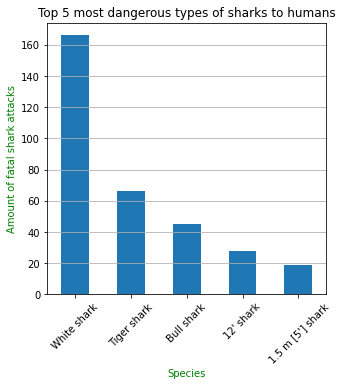

In [18]:
#Finally we plot a vertical bar chart to display the most dangerous type of sharks.

fig, ax = plt.subplots(figsize=(5,5))
df_q1['Species'].value_counts().head(5).plot(kind='bar')
ax.set_xlabel("Species")
ax.xaxis.label.set_color('green')
ax.set_ylabel("Amount of fatal shark attacks")
ax.yaxis.label.set_color('green')
plt.xticks(rotation=45)
ax.grid(True, axis='y')
ax.set_title("Top 5 most dangerous types of sharks to humans")

plt.show()

The barchart shows that the top 5 shark species that are involved in shark attacks are the White shark, Tiger shark, Bull shark, 12' shark and 5' shark.


**2. Are children more likely to be attacked by sharks?**


For this exercise we define children as the respondents with an age under 18.

In [32]:
df_q2 = df_q1.copy()
display(df_q2)


,Type,Activity,Age,Fatal,Species
6,Unprovoked,Swimming,18,Y,Tiger shark
58,Unprovoked,Scuba diving,49,Y,"Tiger shark, female"
59,Sea Disaster,2 boats capsized,49,Y,Some drowned but other may have been killed by...
64,Unprovoked,Night bathing,22,Y,Tiger shark
91,Unprovoked,"Swimming, poaching abalone",35,Y,"White shark, 3 to 3.5m"
...,...,...,...,...,...
6297,Unprovoked,Diving,16,Y,Said to involve a grey nurse shark that leapt ...
6298,Unprovoked,Pearl diving,16,Y,Said to involve a grey nurse shark that leapt ...
6299,Unprovoked,Swimming,16,Y,Said to involve a grey nurse shark that leapt ...
6300,Unprovoked,NaN,16,Y,Said to involve a grey nurse shark that leapt ...


We make a new column named 'Age group'. For this column we have boolean values 'False' (age <= 17) and 'True' (age >= 18).

In [41]:
df_q2['Age group'] = df_q2.loc[:, 'Age'] <= '17'
display(df_q2)

,Type,Activity,Age,Fatal,Species,Child,Age group
6,Unprovoked,Swimming,18,Y,Tiger shark,No,False
58,Unprovoked,Scuba diving,49,Y,"Tiger shark, female",No,False
59,Sea Disaster,2 boats capsized,49,Y,Some drowned but other may have been killed by...,No,False
64,Unprovoked,Night bathing,22,Y,Tiger shark,No,False
91,Unprovoked,"Swimming, poaching abalone",35,Y,"White shark, 3 to 3.5m",No,False
...,...,...,...,...,...,...,...
6297,Unprovoked,Diving,16,Y,Said to involve a grey nurse shark that leapt ...,Yes,True
6298,Unprovoked,Pearl diving,16,Y,Said to involve a grey nurse shark that leapt ...,Yes,True
6299,Unprovoked,Swimming,16,Y,Said to involve a grey nurse shark that leapt ...,Yes,True
6300,Unprovoked,NaN,16,Y,Said to involve a grey nurse shark that leapt ...,Yes,True


In [42]:
#Rename the boolean values: 'False' will be 'Adult' and 'True' will be 'Child'
df_q2['Age group'] = df_q2['Age group'].replace({False: 'Adult', True:'Child'})
display(df_q2)


,Type,Activity,Age,Fatal,Species,Child,Age group
6,Unprovoked,Swimming,18,Y,Tiger shark,No,Adult
58,Unprovoked,Scuba diving,49,Y,"Tiger shark, female",No,Adult
59,Sea Disaster,2 boats capsized,49,Y,Some drowned but other may have been killed by...,No,Adult
64,Unprovoked,Night bathing,22,Y,Tiger shark,No,Adult
91,Unprovoked,"Swimming, poaching abalone",35,Y,"White shark, 3 to 3.5m",No,Adult
...,...,...,...,...,...,...,...
6297,Unprovoked,Diving,16,Y,Said to involve a grey nurse shark that leapt ...,Yes,Child
6298,Unprovoked,Pearl diving,16,Y,Said to involve a grey nurse shark that leapt ...,Yes,Child
6299,Unprovoked,Swimming,16,Y,Said to involve a grey nurse shark that leapt ...,Yes,Child
6300,Unprovoked,NaN,16,Y,Said to involve a grey nurse shark that leapt ...,Yes,Child


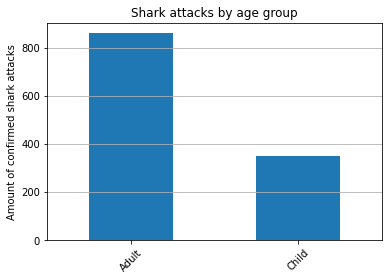

In [44]:
#Plot the column 'Age group' to see the difference in shark attacks between childs and adults

df_q2['Age group'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Amount of confirmed shark attacks')
plt.title('Shark attacks by age group')
plt.grid(True, axis='y')
plt.show()

The barchart shows that children aren't more likely to be attacked by sharks than adults

**3. Are shark attacks where sharks were provoked more or less dangerous?**


In [46]:
df_q3 = df_q2.copy()

In [47]:
#For this question we look at the columns 'Type' and 'Fatal'
#First look at all the unique values for the column 'Type'
all_unique_values('Type')

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster'], dtype=object)

In [49]:
#We want to filter this column for the values 'Unprovoked' and 'Provoked'
#This means that we dropp the rows with the other values.
#define values
values = ['Boating', 'Invalid', 'Questionable','Sea Disaster']

#drop rows that contain any value in the list
df_q3 = df_q3[df_q3.Type.isin(values) == False]
display(df_q3)

,Type,Activity,Age,Fatal,Species,Child,Age group
6,Unprovoked,Swimming,18,Y,Tiger shark,No,Adult
58,Unprovoked,Scuba diving,49,Y,"Tiger shark, female",No,Adult
64,Unprovoked,Night bathing,22,Y,Tiger shark,No,Adult
91,Unprovoked,"Swimming, poaching abalone",35,Y,"White shark, 3 to 3.5m",No,Adult
144,Unprovoked,Snorkeling,33,Y,9' shark,No,Adult
...,...,...,...,...,...,...,...
6297,Unprovoked,Diving,16,Y,Said to involve a grey nurse shark that leapt ...,Yes,Child
6298,Unprovoked,Pearl diving,16,Y,Said to involve a grey nurse shark that leapt ...,Yes,Child
6299,Unprovoked,Swimming,16,Y,Said to involve a grey nurse shark that leapt ...,Yes,Child
6300,Unprovoked,NaN,16,Y,Said to involve a grey nurse shark that leapt ...,Yes,Child


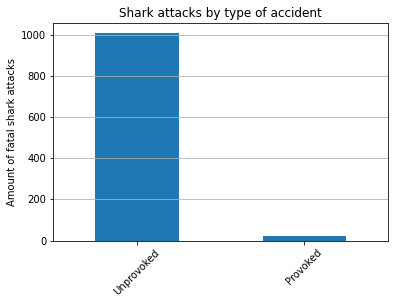

In [50]:
#We already filerd the dataframe on the column 'Fatal' so there are only Fatal cases in the dataframe.
#Now we can plot the column 'Type' on the x-as to see the difference between unprovoked and provoked.
df_q3['Type'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Amount of fatal shark attacks')
plt.title('Shark attacks by type of accident')
plt.grid(True, axis='y')
plt.show()


The barchart shows that shark attacks that were provoked were not dangerous


**4. Are certain activities more likely to result in a shark attack?**


In [60]:
#To answer this question we have to look at all the shark attacks, so not only the fatal ones. 
display(df)

,Type,Activity,Age,Fatal,Species
0,Boating,Paddling,57,N,White shark
1,Unprovoked,Standing,11,N,White shark
2,Invalid,Surfing,48,N,White shark
3,Unprovoked,Surfing,48,N,2 m shark
4,Provoked,Free diving,48,N,"Tiger shark, 3m"
...,...,...,...,...,...
6297,Unprovoked,Diving,16,Y,Said to involve a grey nurse shark that leapt ...
6298,Unprovoked,Pearl diving,16,Y,Said to involve a grey nurse shark that leapt ...
6299,Unprovoked,Swimming,16,Y,Said to involve a grey nurse shark that leapt ...
6300,Unprovoked,NaN,16,Y,Said to involve a grey nurse shark that leapt ...


In [61]:
#We then look at all the unique values for the column 'Activity'
all_unique_values('Activity')
df['Activity'].nunique()

1503

In [65]:
#Now we filter on the top 5 most common activities resulting in a shark attack
top(df, 'Activity', 5)


Surfing         976
Swimming        916
Fishing         444
Spearfishing    341
Bathing         165
Name: Activity, dtype: int64

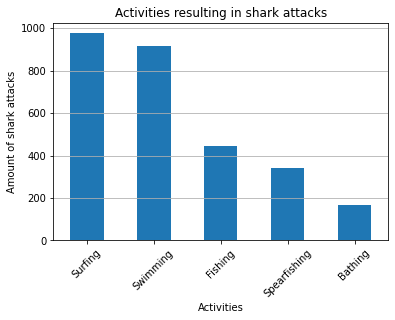

In [66]:
#Now we plot the results in a barchart
top_5_activities = top(df, 'Activity', 5)

top_5_activities.plot(kind='bar')

plt.title('Activities resulting in shark attacks')
plt.xlabel('Activities')
plt.ylabel('Amount of shark attacks')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

The barchart shows that certain activities like Surfing, Swimming, Fishing, Spearfishing and Bathing result in more shark attacks